# DATA COLLECTION AND PREPROCESSING

importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading DataFrame

concrete =pd.read_excel(r"c://users/danhaya/arewads/concrete_research/data/Concrete_Data.xls")
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
concrete.columns = ["cement", "blast_furnace_slag", "fly_ash", "water", "superplasticizer", "coarse_aggregate", "fine_aggregate", "age", "compressive_strength"]

In [4]:
for ingredient in concrete.columns:
    print(ingredient)

cement
blast_furnace_slag
fly_ash
water
superplasticizer
coarse_aggregate
fine_aggregate
age
compressive_strength


Check for missing values

In [5]:
print(concrete.isna().sum())

cement                  0
blast_furnace_slag      0
fly_ash                 0
water                   0
superplasticizer        0
coarse_aggregate        0
fine_aggregate          0
age                     0
compressive_strength    0
dtype: int64


This dataset has no missing values.

### `Check Duplicates`

In [8]:
print(concrete.duplicated().sum())

25


There are 25 duplicates entries in this dataset. let me drop me them

In [9]:
concrete = concrete.drop_duplicates()
print(concrete.duplicated().sum())

0


### `Handling outliers`

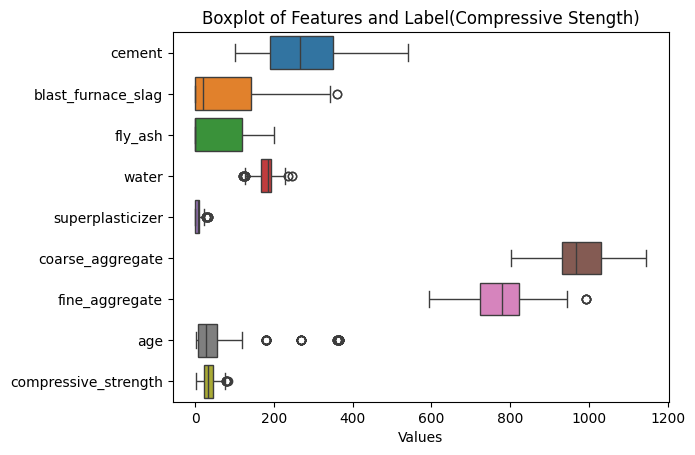

In [19]:
sns.boxplot(data=concrete, orient='h')
plt.xlabel('Values')
plt.title("Boxplot of Features and Label(Compressive Stength)")
plt.show()

In [11]:
concrete.shape

(1005, 9)

In [12]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cement                1005 non-null   float64
 1   blast_furnace_slag    1005 non-null   float64
 2   fly_ash               1005 non-null   float64
 3   water                 1005 non-null   float64
 4   superplasticizer      1005 non-null   float64
 5   coarse_aggregate      1005 non-null   float64
 6   fine_aggregate        1005 non-null   float64
 7   age                   1005 non-null   int64  
 8   compressive_strength  1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [13]:
print(concrete.shape)


(1005, 9)


In [14]:
col_list = list(concrete.columns)
print(col_list)

['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'compressive_strength']


In [15]:
from scipy.stats import iqr
import numpy as np

# Make a copy to keep original safe
df = concrete.copy()


mask = np.ones(len(df), dtype=bool)

for col in col_list:
    data = df[col].values
    col_iqr = iqr(data)
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    lower_threshold = q1 - 1.5 * col_iqr
    upper_threshold = q3 + 1.5 * col_iqr
    
    # Update mask
    mask &= (data >= lower_threshold) & (data <= upper_threshold)

# Apply mask once
df_clean = df[mask]

print("Original shape:", concrete.shape)
print("After removing outliers:", df_clean.shape)


Original shape: (1005, 9)
After removing outliers: (911, 9)


In [16]:
#create new column called water-cement ratio
df_clean['water_cement_ratio'] = df_clean['water'] / df_clean['cement']
df_clean.head()

C:\Users\Danhaya\AppData\Local\Temp\ipykernel_700\2490325260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['water_cement_ratio'] = df_clean['water'] / df_clean['cement']


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength,water_cement_ratio
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.300000
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847,0.857143
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770,0.600000
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291,0.857143
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790,0.480000


In [18]:
df_clean.to_csv("../data/clean_data1.csv", index=False)